<a href="https://colab.research.google.com/github/hadjerseddik/Crop_classification/blob/main/Train/PlantVillageDataSet/Test_experiments/plantVillageMobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dependencies

#   Plant Classification 

a complete study that explore images from drive folder switch them to dataframe, generate them into a MobileNet model 
the use case of the study is to be able to classify a specific giving image to its class properly  
then we saved each of the dataset.csv,the model architecture.h5 and the history.csvthe 

In [ ]:
import tensorflow as tf
print(tf.__version__)
 
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
 
from tensorflow.keras.models import Model,Sequential,load_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, AveragePooling2D, GlobalAveragePooling2D, Input, Flatten, Dropout
 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras import models
 
import datetime
import numpy as np
import glob
import os
import pandas as pd

2.5.0


***`loading  dataset from drive`***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Copy the zip file to runtime directory to excute faster 

In [ ]:
!cp '/content/drive/MyDrive/shared dataset platVillage/PlantVillage.tar.gz' 'PlantVillage.tar.gz'

**`*Extract the zip file using linux command line'!tar'*`**

In [ ]:
!tar -xf PlantVillage.tar.gz

***`create a dataframe of the train & val folders where background folder is deleted and the name of the each label is desplayed properly without ambiguity`***  

In [ ]:
trainPath = '/content/PlantVillage/train'
lists = os.listdir(trainPath)
labels = []
file_lst = []

for folder in lists:
    files = os.listdir(trainPath +"/"+folder)
    if(folder != 'background'):   
      files = [folder+'/'+file  for file in files]
      file_lst.extend(files)
      labels.extend([folder.split(sep='___')[0] for i in range(len(files))])
#print(len(file_lst))
#print(len(labels))
train_df = pd.DataFrame(list(zip(file_lst,labels)),columns =["path","label"])
print(train_df)


                                                    path   label
0      Grape___healthy/c05f4201-5ab9-4bbd-b19e-c36515...   Grape
1      Grape___healthy/c60dbdbb-4ae6-4265-a587-de11c3...   Grape
2      Grape___healthy/2d73d890-3628-41e7-aaa7-210781...   Grape
3      Grape___healthy/29fe6146-b910-437d-991b-9f684c...   Grape
4      Grape___healthy/e97052d8-edd8-4e09-bdbb-c1c312...   Grape
...                                                  ...     ...
43439  Potato___healthy/9d7d1bb9-1b10-4a8f-a961-e404b...  Potato
43440  Potato___healthy/b9ea902d-e557-4fa5-893b-39a7a...  Potato
43441  Potato___healthy/b8b7b98a-eb1a-4213-9b0b-aeef4...  Potato
43442  Potato___healthy/799b10e8-ba67-4e08-9abe-74878...  Potato
43443  Potato___healthy/7948ada9-eabc-4cb7-a579-b73e9...  Potato

[43444 rows x 2 columns]


In [ ]:
validationPath = '/content/PlantVillage/val'
lists = os.listdir(validationPath)
labels = []
file_lst = []

for folder in lists:
    files = os.listdir(validationPath +"/"+folder)
    if(folder != 'background'): 
      files = [folder+'/'+file  for file in files]
      file_lst.extend(files)
      labels.extend([folder.split(sep='___')[0] for i in range(len(files))])
    

validation_df = pd.DataFrame(list(zip(file_lst,labels)),columns =["path","label"])
print(validation_df)


                                                    path   label
0      Grape___healthy/d9399e07-dc4e-4c86-af6d-a74a4b...   Grape
1      Grape___healthy/dcd949b9-297d-40aa-b4dd-7f347a...   Grape
2      Grape___healthy/ac753212-e6d7-44b9-9722-4413a7...   Grape
3      Grape___healthy/9d1124c3-4be4-4998-b1f8-92b0d0...   Grape
4      Grape___healthy/603a6e76-4457-4ac2-a549-1560c7...   Grape
...                                                  ...     ...
10856  Potato___healthy/52dd2fdd-6966-450c-a42b-ee144...  Potato
10857  Potato___healthy/163ada72-4288-4f85-a3c1-feed2...  Potato
10858  Potato___healthy/111cd9d8-4d27-4225-be9e-d29b2...  Potato
10859  Potato___healthy/a02b6205-b40a-4178-8b34-3494f...  Potato
10860  Potato___healthy/a3ec91aa-8503-4711-a912-0d142...  Potato

[10861 rows x 2 columns]


` ***Image generators***`

In [ ]:
batch_size = 32
image_size=(224,224)
nb_epoch = 15

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
                  dataframe=train_df,
                  x_col="path",
                  y_col="label",
                  directory= '/content/PlantVillage/train/',
                  target_size=image_size,
                  batch_size=batch_size
                  )

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
                  dataframe=validation_df,
                  x_col="path",
                  y_col="label",
                  directory= '/content/PlantVillage/val/',
                  target_size=image_size,
                  batch_size=batch_size
                  ) 

Found 43444 validated image filenames belonging to 14 classes.
Found 10861 validated image filenames belonging to 14 classes.


In [ ]:
print(train_generator.class_indices)

{'Apple': 0, 'Blueberry': 1, 'Cherry_(including_sour)': 2, 'Corn_(maize)': 3, 'Grape': 4, 'Orange': 5, 'Peach': 6, 'Pepper,_bell': 7, 'Potato': 8, 'Raspberry': 9, 'Soybean': 10, 'Squash': 11, 'Strawberry': 12, 'Tomato': 13}


Build model

In [ ]:
class_number = 14
def build_model_graph(class_number=class_number):
  base_model = MobileNet(weights='imagenet', include_top=False,input_shape = (224,224,3))
  
  x = base_model.output
  x = GlobalAveragePooling2D()(x)
  #x = Dense(512, activation='relu')(x)
  x = Dropout(0.3)(x)
  x = Dense(256, activation='relu')(x)
  predictions = Dense(class_number, activation='softmax')(x)
  model = Model(base_model.input, predictions)

  return model

In [ ]:
model = build_model_graph()
print(model.summary())

17227776/17225924 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
______________________________________________________________

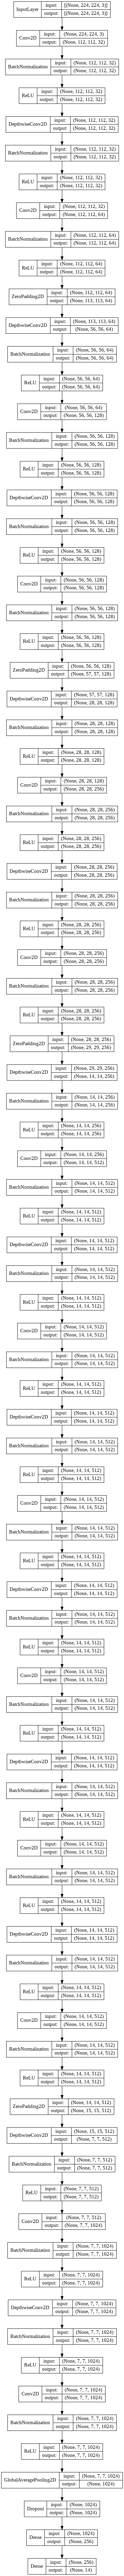

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=False)

# Model compiling & fitting

In [ ]:

model.compile(optimizer=optimizers.SGD(learning_rate=1e-3, momentum=0.9), 
              loss='categorical_crossentropy' ,
              metrics = ['accuracy']
              )

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
hist=model.fit(train_generator,
          epochs=nb_epoch,
          validation_data=validation_generator
         ) 

Epoch 1/15
995/995 [==============================] - 456s 458ms/step - loss: 0.0207 - accuracy: 0.9945 - val_loss: 0.0125 - val_accuracy: 0.9966
Epoch 2/15
995/995 [==============================] - 453s 455ms/step - loss: 0.0155 - accuracy: 0.9955 - val_loss: 0.0078 - val_accuracy: 0.9979
Epoch 3/15
995/995 [==============================] - 452s 454ms/step - loss: 0.0099 - accuracy: 0.9972 - val_loss: 0.0074 - val_accuracy: 0.9977
Epoch 4/15
995/995 [==============================] - 453s 455ms/step - loss: 0.0061 - accuracy: 0.9988 - val_loss: 0.0073 - val_accuracy: 0.9981
Epoch 5/15
995/995 [==============================] - 456s 458ms/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 0.0067 - val_accuracy: 0.9981
Epoch 6/15
995/995 [==============================] - 459s 461ms/step - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.0057 - val_accuracy: 0.9985
Epoch 7/15
995/995 [==============================] - 457s 460ms/step - loss: 0.0036 - accuracy: 0.9992 - val_loss: 0.0051 -

# Save the MobileNet architecture to drive

In [ ]:
results = '/content/drive/MyDrive/Plant classification/Results'
os.mkdir(results) 

In [ ]:
PlantVillageDataSet = '/content/drive/MyDrive/Plant classification/Results/PlantVillageDataSet'
os.mkdir(PlantVillageDataSet) 

In [ ]:
MobileNetArch = '/content/drive/MyDrive/Plant classification/Results/PlantVillageDataSet/MobileNetArch'
os.mkdir(MobileNetArch) 

In [ ]:
target_dir = '/content/drive/MyDrive/Plant classification/Results/PlantVillageDataSet/MobileNetArch'
architecture_name = "MobileNetArch"
#ct = str(datetime.datetime.now())
model.save(target_dir+'/'+architecture_name+'.h5')

# print , plot and save history.csv

Print the histoy values

In [ ]:
print(hist.history)

{'loss': [0.020735790953040123, 0.015488369390368462, 0.009899388998746872, 0.006080225575715303, 0.005185775924474001, 0.0034683498088270426, 0.0035718479193747044, 0.0029174024239182472, 0.0021985939238220453, 0.002559835324063897, 0.0016475277952849865, 0.0015964250778779387, 0.0016869230894371867, 0.0016641817055642605, 0.0015168730169534683], 'accuracy': [0.9945023655891418, 0.995476245880127, 0.9971726536750793, 0.9988062381744385, 0.9987120032310486, 0.9992460608482361, 0.9991518259048462, 0.9993717074394226, 0.9996544122695923, 0.9994345307350159, 0.9997801184654236, 0.9996544122695923, 0.9997172951698303, 0.9995601773262024, 0.9997801184654236], 'val_loss': [0.012472545728087425, 0.007801484316587448, 0.007364736869931221, 0.00731925293803215, 0.006734396331012249, 0.005723081529140472, 0.005093843210488558, 0.0048395260237157345, 0.004514106549322605, 0.005074572749435902, 0.004903062712401152, 0.005021154414862394, 0.00502158235758543, 0.00472617382183671, 0.0047134952619671

plot the model acciracny 

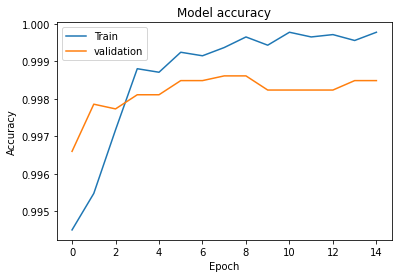

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

convert the history to csv files

In [ ]:
hist = pd.DataFrame(hist.history) 

In [ ]:
hist_csv_file = '/content/drive/MyDrive/Plant classification/Results/PlantVillageDataSet/MobileNetArch/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist.to_csv(f)

# Save the dataset as csv files to drive 

In [ ]:
train_df.to_csv('/content/drive/MyDrive/Plant classification/Results/PlantVillageDataSet/train.csv')

In [ ]:
validation_df.to_csv('/content/drive/MyDrive/Plant classification/Results/PlantVillageDataSet/validation.csv')

# Test the model with random images

In [ ]:
model= model_load()

In [ ]:
img_path = '/content/PlantVillage/train/Tomato___Early_blight/0012b9d2-2130-4a06-a834-b1f3af34f57e___RS_Erly.B 8389.JPG'

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = (img_batch)*(1./255)

result = model.predict(img_preprocessed)
print(result)

[[4.2201219e-07 5.5149115e-07 2.2169346e-05 9.3389586e-05 4.3959444e-05
  1.4883149e-04 5.6161800e-05 1.5707428e-03 4.8991392e-04 6.1567625e-06
  9.0962503e-06 5.7600268e-05 3.7749684e-05 9.9746323e-01]]


In [ ]:
index_max=result.argmax(axis=-1)
print(index_max)

[13]


In [ ]:
print(train_generator.class_indices)

{'Apple': 0, 'Blueberry': 1, 'Cherry_(including_sour)': 2, 'Corn_(maize)': 3, 'Grape': 4, 'Orange': 5, 'Peach': 6, 'Pepper,_bell': 7, 'Potato': 8, 'Raspberry': 9, 'Soybean': 10, 'Squash': 11, 'Strawberry': 12, 'Tomato': 13}
